Имеются данные:
+ ad_id – идентификатор объявления (рекламы)
+ xyz_campaign_id – идентификатор рекламной кампании в базе компании X
+ fb_campaign_id – идентификатор кампании в Facebook
+ age – возрастная группа, которой показывалась реклама
+ gender – пол тех, кому показывалась реклама
+ interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
+ impressions – число показов
+ clicks – число кликов
+ spent – сумма, которую компания потратила на показ объявления 
+ total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
+ approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 
import os
%matplotlib inline
import scipy.stats as sps
sns.set(font_scale = 2, style='whitegrid',rc={'figure.figsize':(20,7)})

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-varenichenko-22/My_practice/Modul_6_Statistics/conversion.csv')

In [6]:
# проверим число наблюдений и столбцов, типы данных, наличие пропущенных значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
# Сколько уникальных рекламных кампаний было проведено?
df.xyz_campaign_id.nunique()

3

In [9]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


График распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook

In [16]:
df_1 = df.groupby('fb_campaign_id', as_index = False).agg({'Impressions': 'sum'})
df_1['Impressions_log'] = np.log(df_1.Impressions)

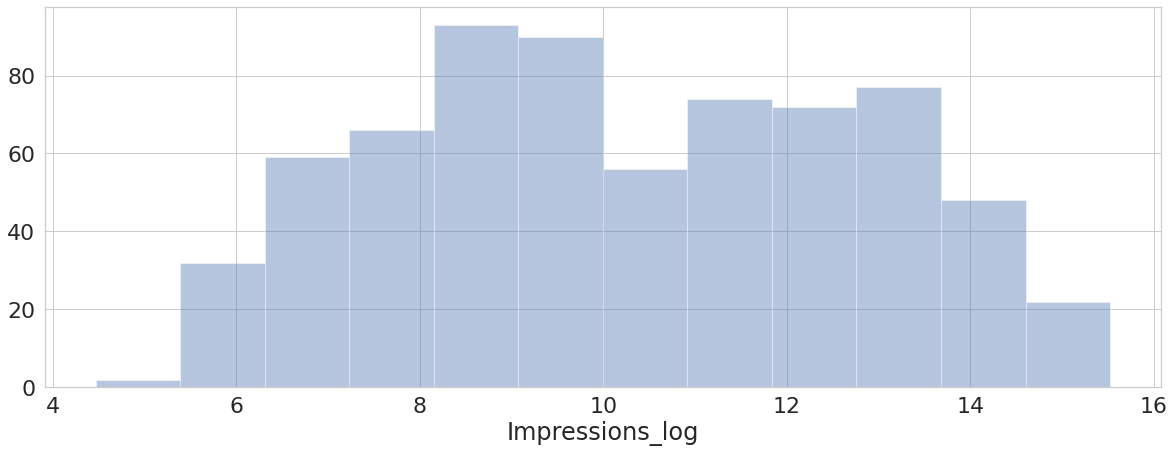

In [19]:
sns.distplot(df_1.Impressions_log, kde = False)

In [3]:
# CTR 

df['CTR'] = df.Clicks / df.Impressions 
df.sort_values('CTR', ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


Визуализируем CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


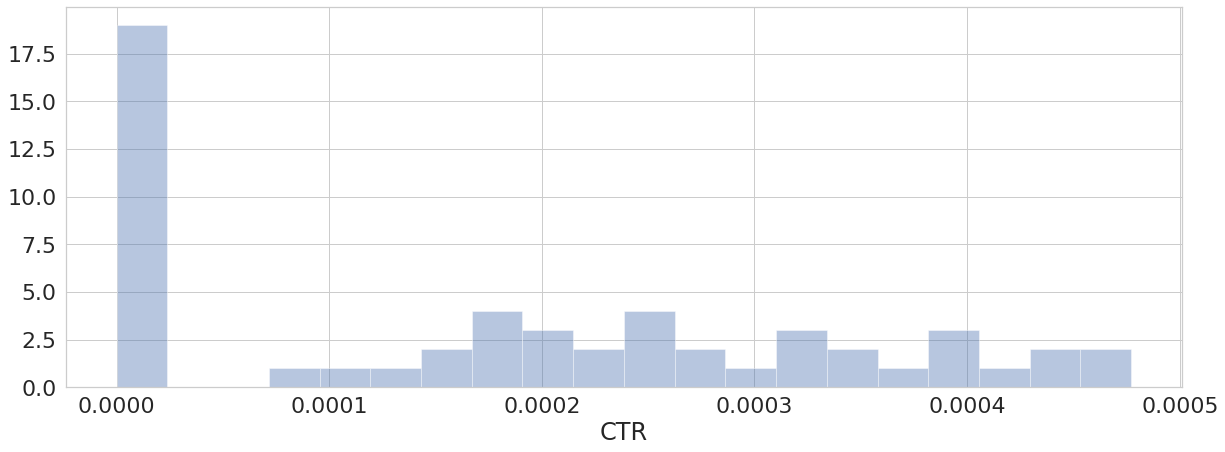

In [23]:
sns.distplot(df.query('xyz_campaign_id == 916').CTR, kde = False, bins=20)


In [26]:
# CPC 
df['CPC'] = df.Spent / df.Clicks

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [27]:
df['CPC'].isna().sum()

207

In [30]:
df_3 = df.dropna()
df_3.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
CTR                    0
CPC                    0
dtype: int64

In [31]:
df_3.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [33]:
round((df_3.CPC.quantile(q = 0.75) - df_3.CPC.quantile(q = 0.25)), 2)

0.25

In [34]:
sps.iqr(df_3.CPC)

0.25436369905

Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


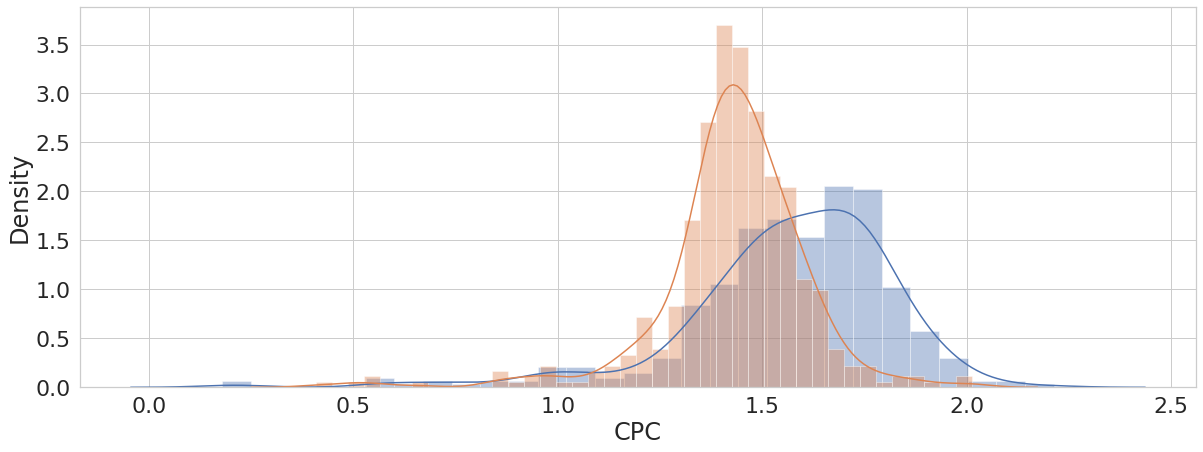

In [38]:
sns.distplot(df_3.query("gender == 'M'").CPC)
sns.distplot(df_3.query("gender == 'F'").CPC)

In [45]:
# Посчитаем конверсию из клика в покупку. 
# В качестве ответа укажите конверсию для объявления 1121814 в процентах

df_4 = df.query('ad_id == 1121814')
convertion_rate = df_4.Approved_Conversion / df_4.Clicks *100
round(convertion_rate_1121814, 2)

860    3.09
dtype: float64